In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Dell\Desktop\cognorise infotech\Unemployment in india\Unemployment in india.csv")

In [4]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),740.0,1.178795e+01,1.072130e+01,0.00,4.657500e+00,8.35,1.588750e+01,76.74
Estimated Employed,740.0,7.204460e+06,8.087988e+06,49420.00,1.190404e+06,4744178.50,1.127549e+07,45777509.00
Estimated Labour Participation Rate (%),740.0,4.263012e+01,8.111094e+00,13.33,3.806250e+01,41.16,4.550500e+01,72.57


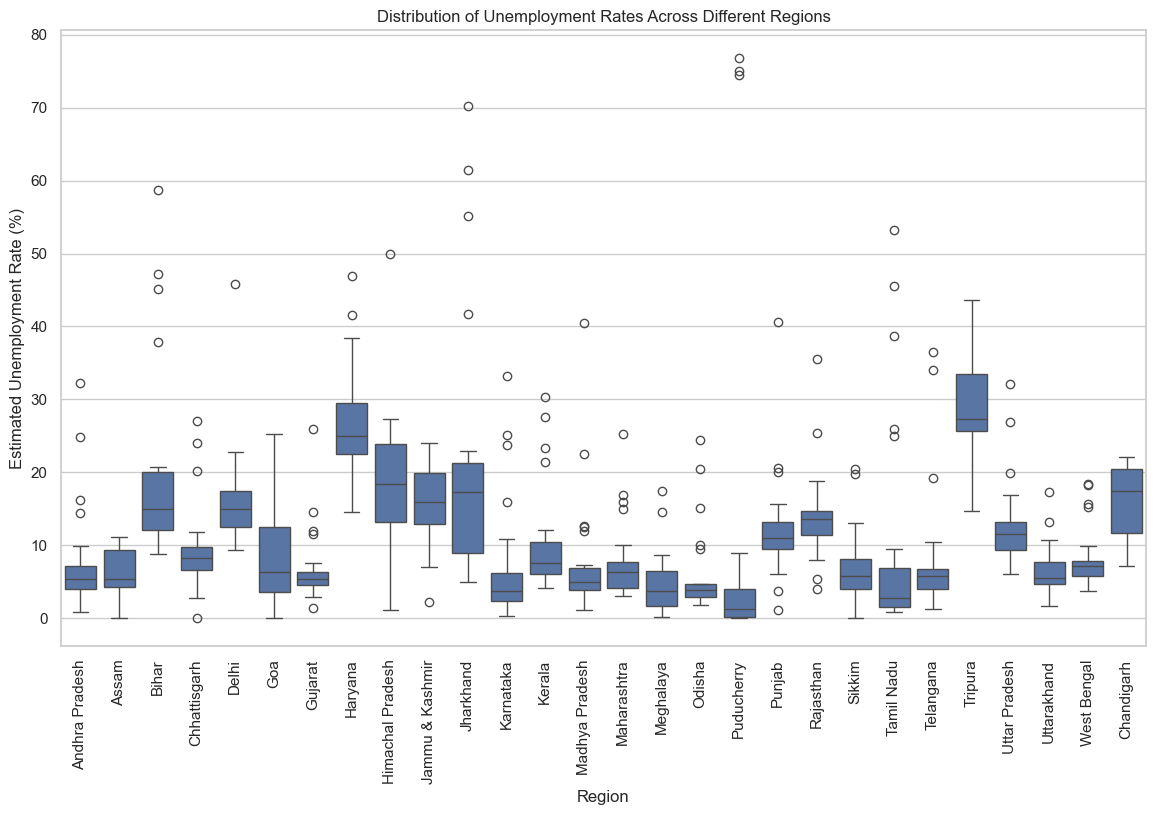

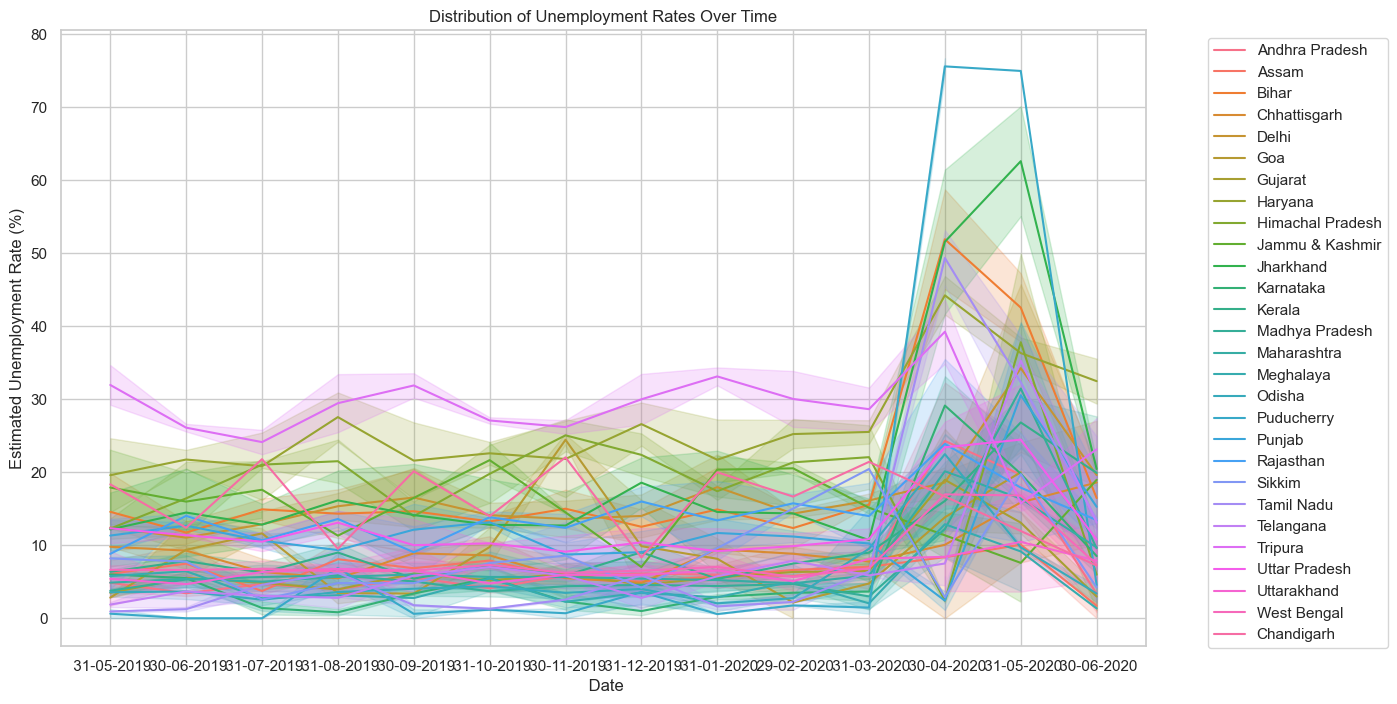

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Distribution of Unemployment Rates Across Different Regions
plt.figure(figsize=(14, 8))
sns.boxplot(x='Region', y=' Estimated Unemployment Rate (%)', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Unemployment Rates Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.show()

# Distribution of Unemployment Rates Over Time
plt.figure(figsize=(14, 8))
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)', hue='Region', data=df)
plt.title('Distribution of Unemployment Rates Over Time')
plt.xlabel(' Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

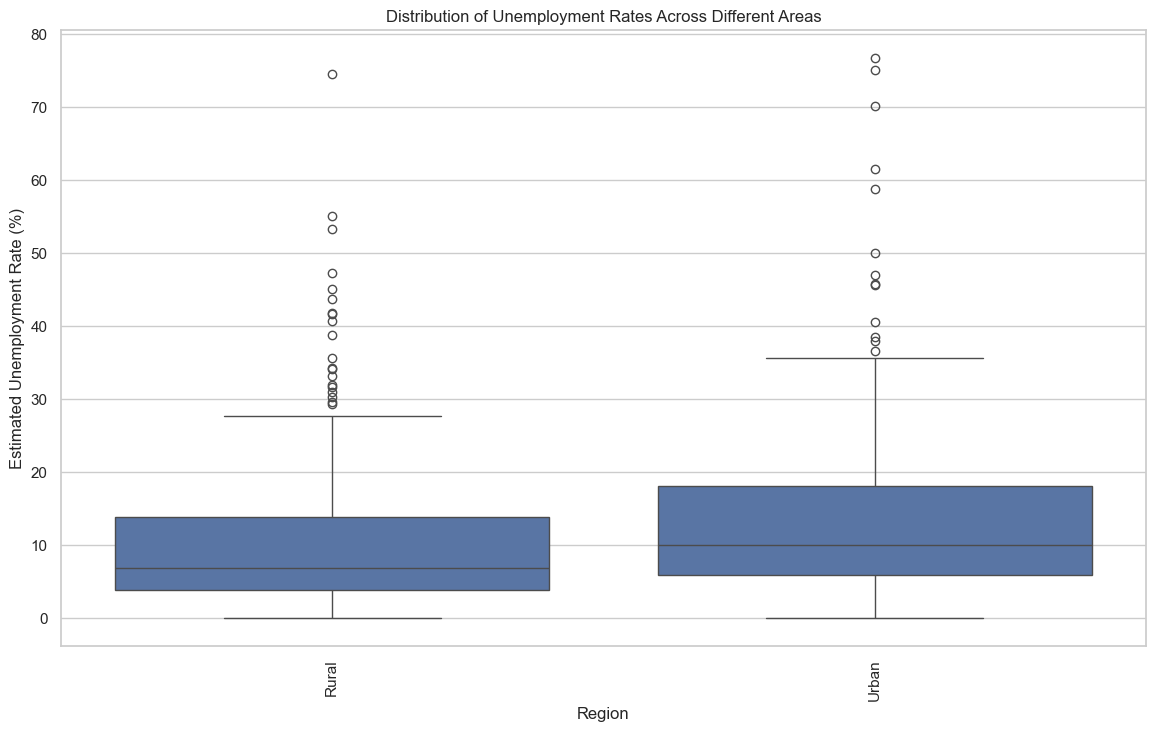

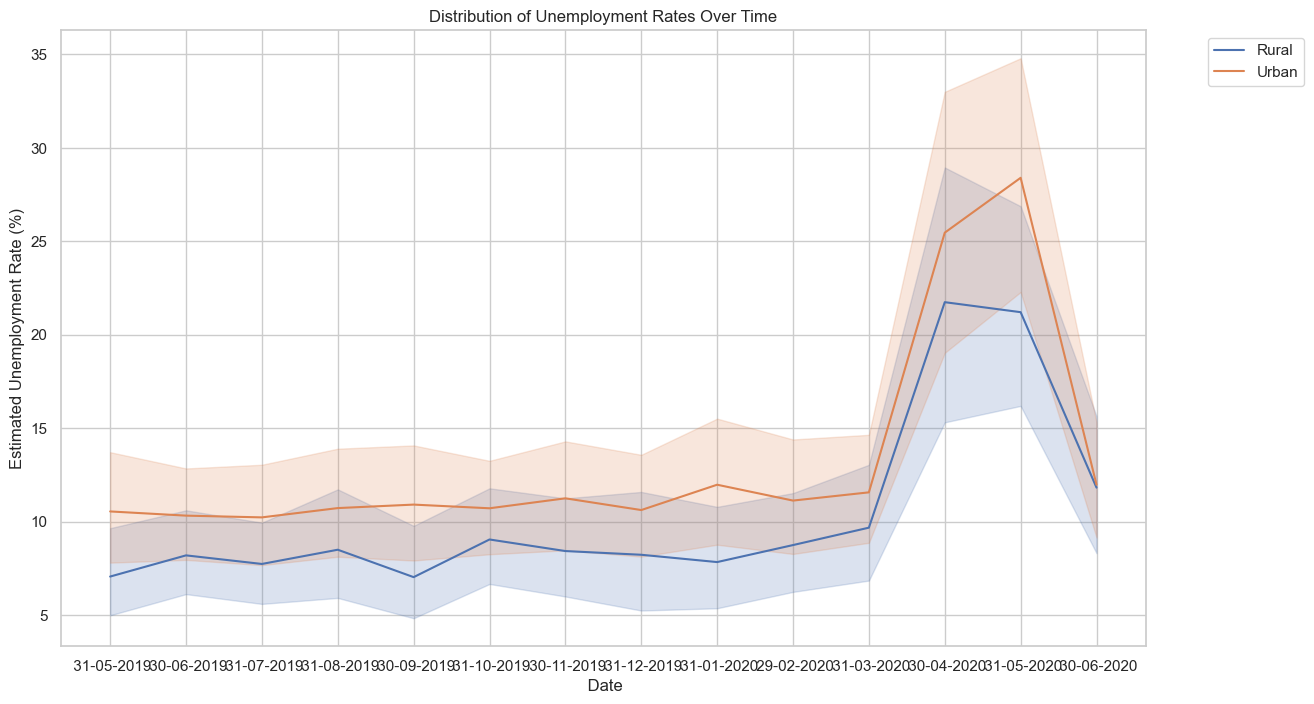

In [48]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Area', y=' Estimated Unemployment Rate (%)', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Unemployment Rates Across Different Areas')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.show()

# Distribution of Unemployment Rates Over Time
plt.figure(figsize=(14, 8))
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)', hue='Area', data=df)
plt.title('Distribution of Unemployment Rates Over Time')
plt.xlabel(' Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [54]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

Correlation coefficient between 'Estimated Unemployment Rate (%)' and 'Estimated Labour Participation Rate (%)': 0.00


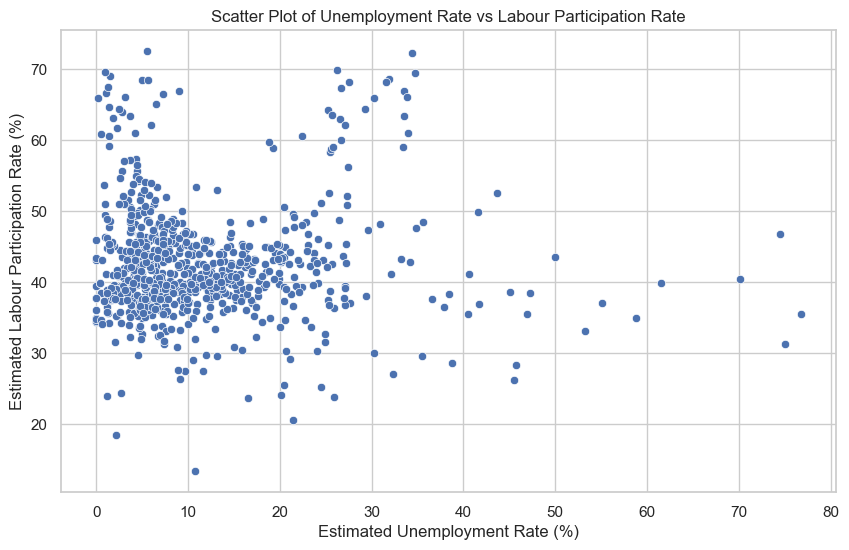

In [61]:
unemployment_rate_col = 'Estimated Unemployment Rate (%)'
labour_participation_col = 'Estimated Labour Participation Rate (%)'

# Ensure columns are present
if unemployment_rate_col not in df.columns:
    raise KeyError(f"'{unemployment_rate_col}' column is missing from the DataFrame")
if labour_participation_col not in df.columns:
    raise KeyError(f"'{labour_participation_col}' column is missing from the DataFrame")

# Calculate correlation coefficient
correlation = df[[unemployment_rate_col, labour_participation_col]].corr().iloc[0, 1]

print(f"Correlation coefficient between '{unemployment_rate_col}' and '{labour_participation_col}': {correlation:.2f}")

# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[unemployment_rate_col], y=df[labour_participation_col])
plt.title('Scatter Plot of Unemployment Rate vs Labour Participation Rate')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.show()

In [88]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

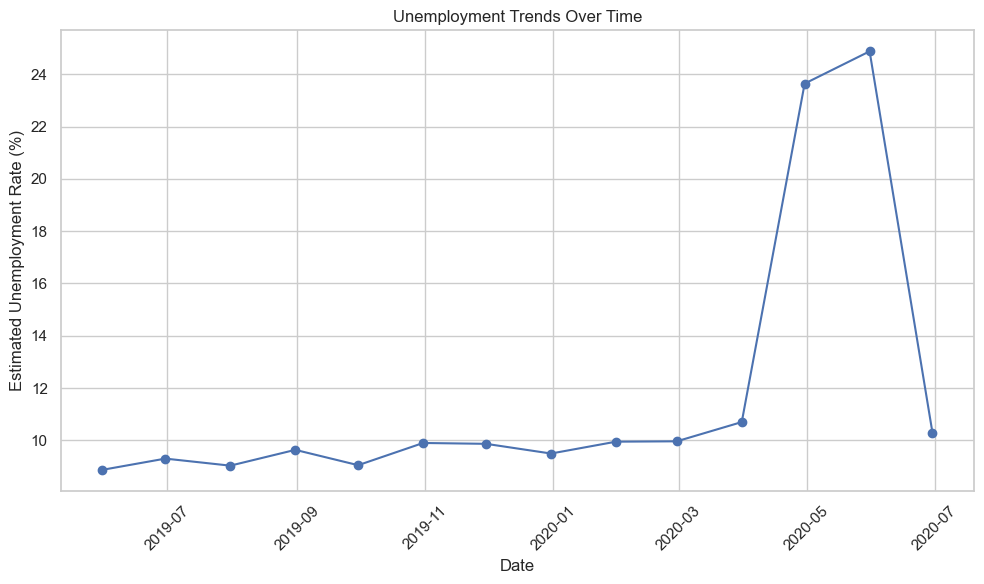

In [89]:
df['Date'] = pd.to_datetime(df['Date'])

# Group by date to get the average unemployment rate over time
unemployment_trend = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()

# Step 3: Visualize the unemployment trends over time
plt.figure(figsize=(10, 6))
plt.plot(unemployment_trend['Date'], unemployment_trend['Estimated Unemployment Rate (%)'], marker='o')
plt.title('Unemployment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [83]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

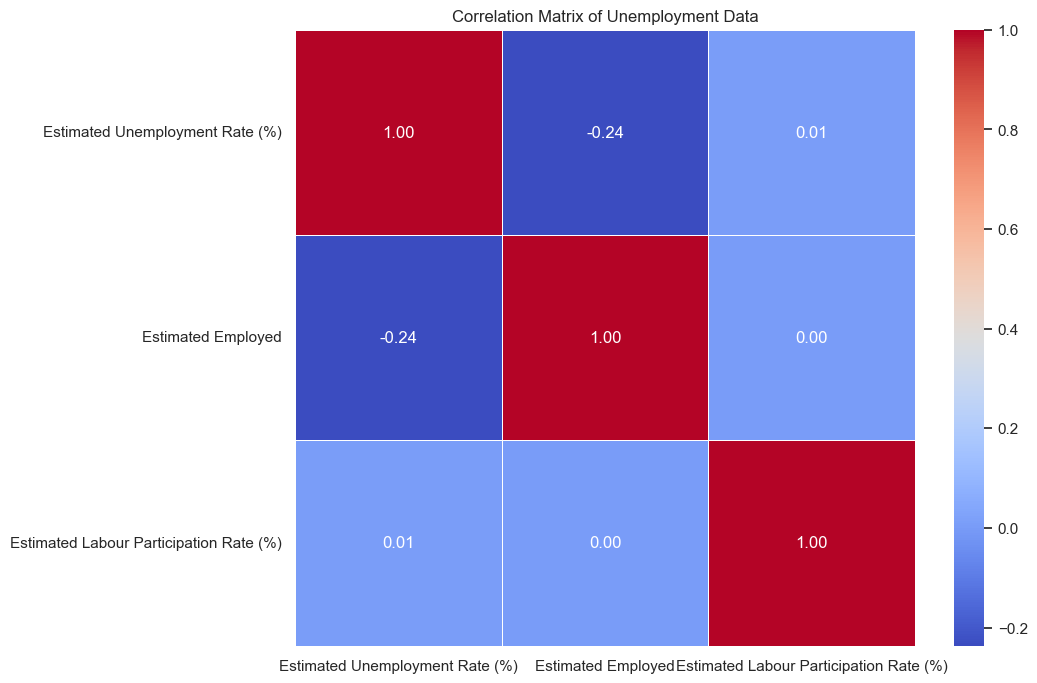

In [91]:
numerical_columns = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']

# Step 3: Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Step 4: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Unemployment Data')
plt.show()

In [5]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

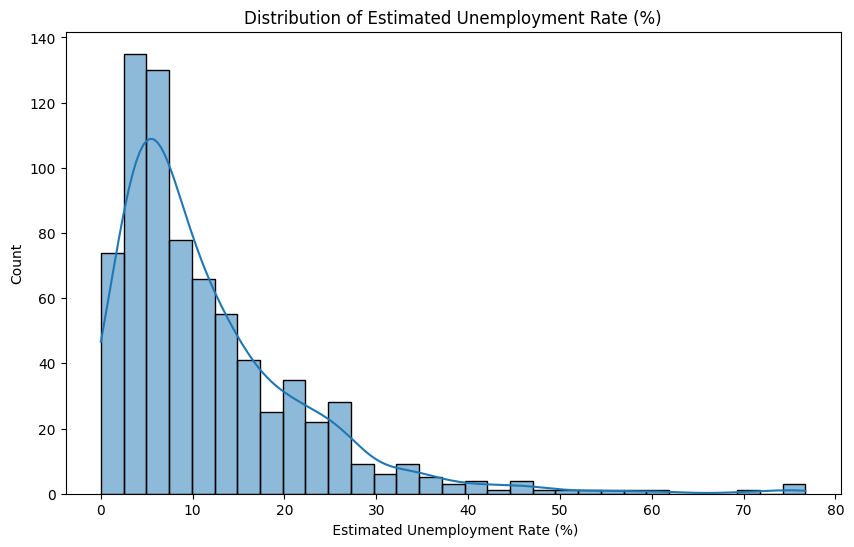

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df[' Estimated Unemployment Rate (%)'], kde=True)
plt.title('Distribution of Estimated Unemployment Rate (%)')
plt.show()


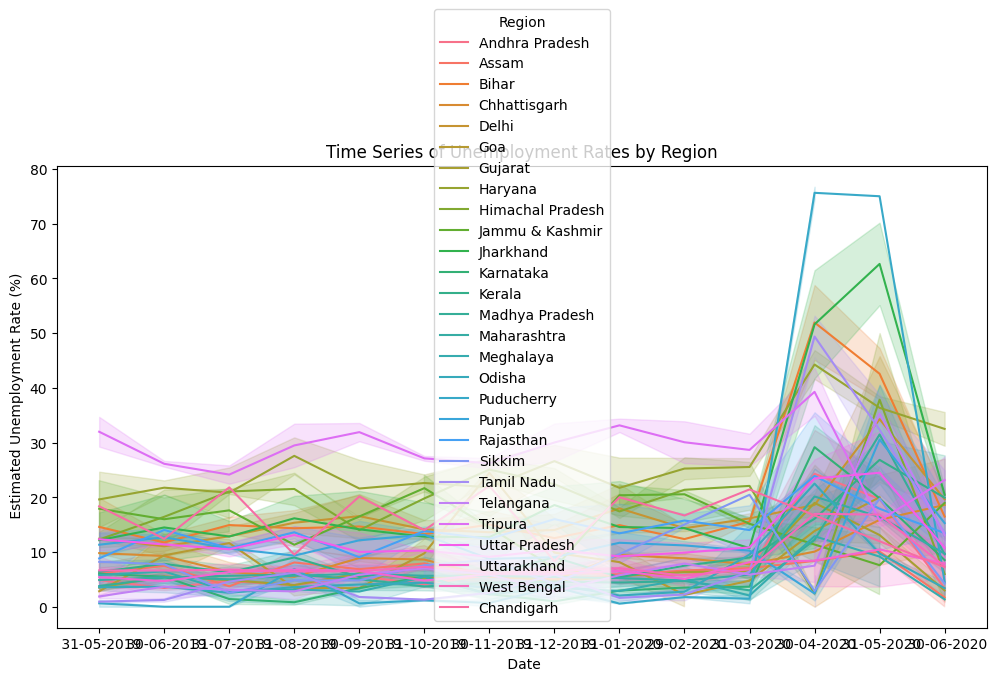

In [16]:
# Time Series Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=' Date', y=' Estimated Unemployment Rate (%)', hue='Region')
plt.title('Time Series of Unemployment Rates by Region')
plt.show()


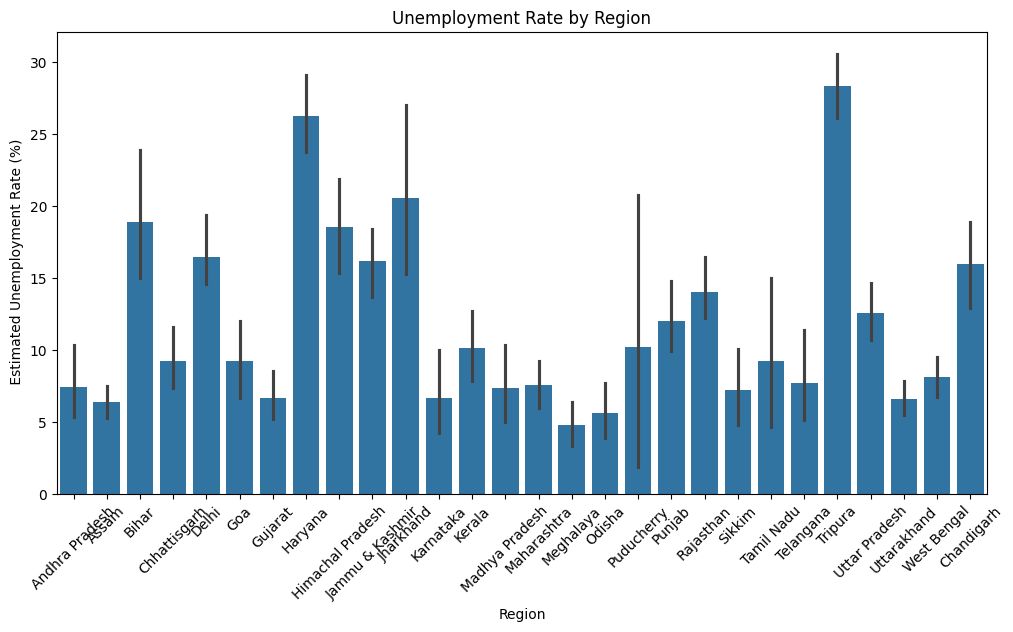

In [18]:
# Regional Analysis
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Region', y=' Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate by Region')
plt.xticks(rotation=45)
plt.show()

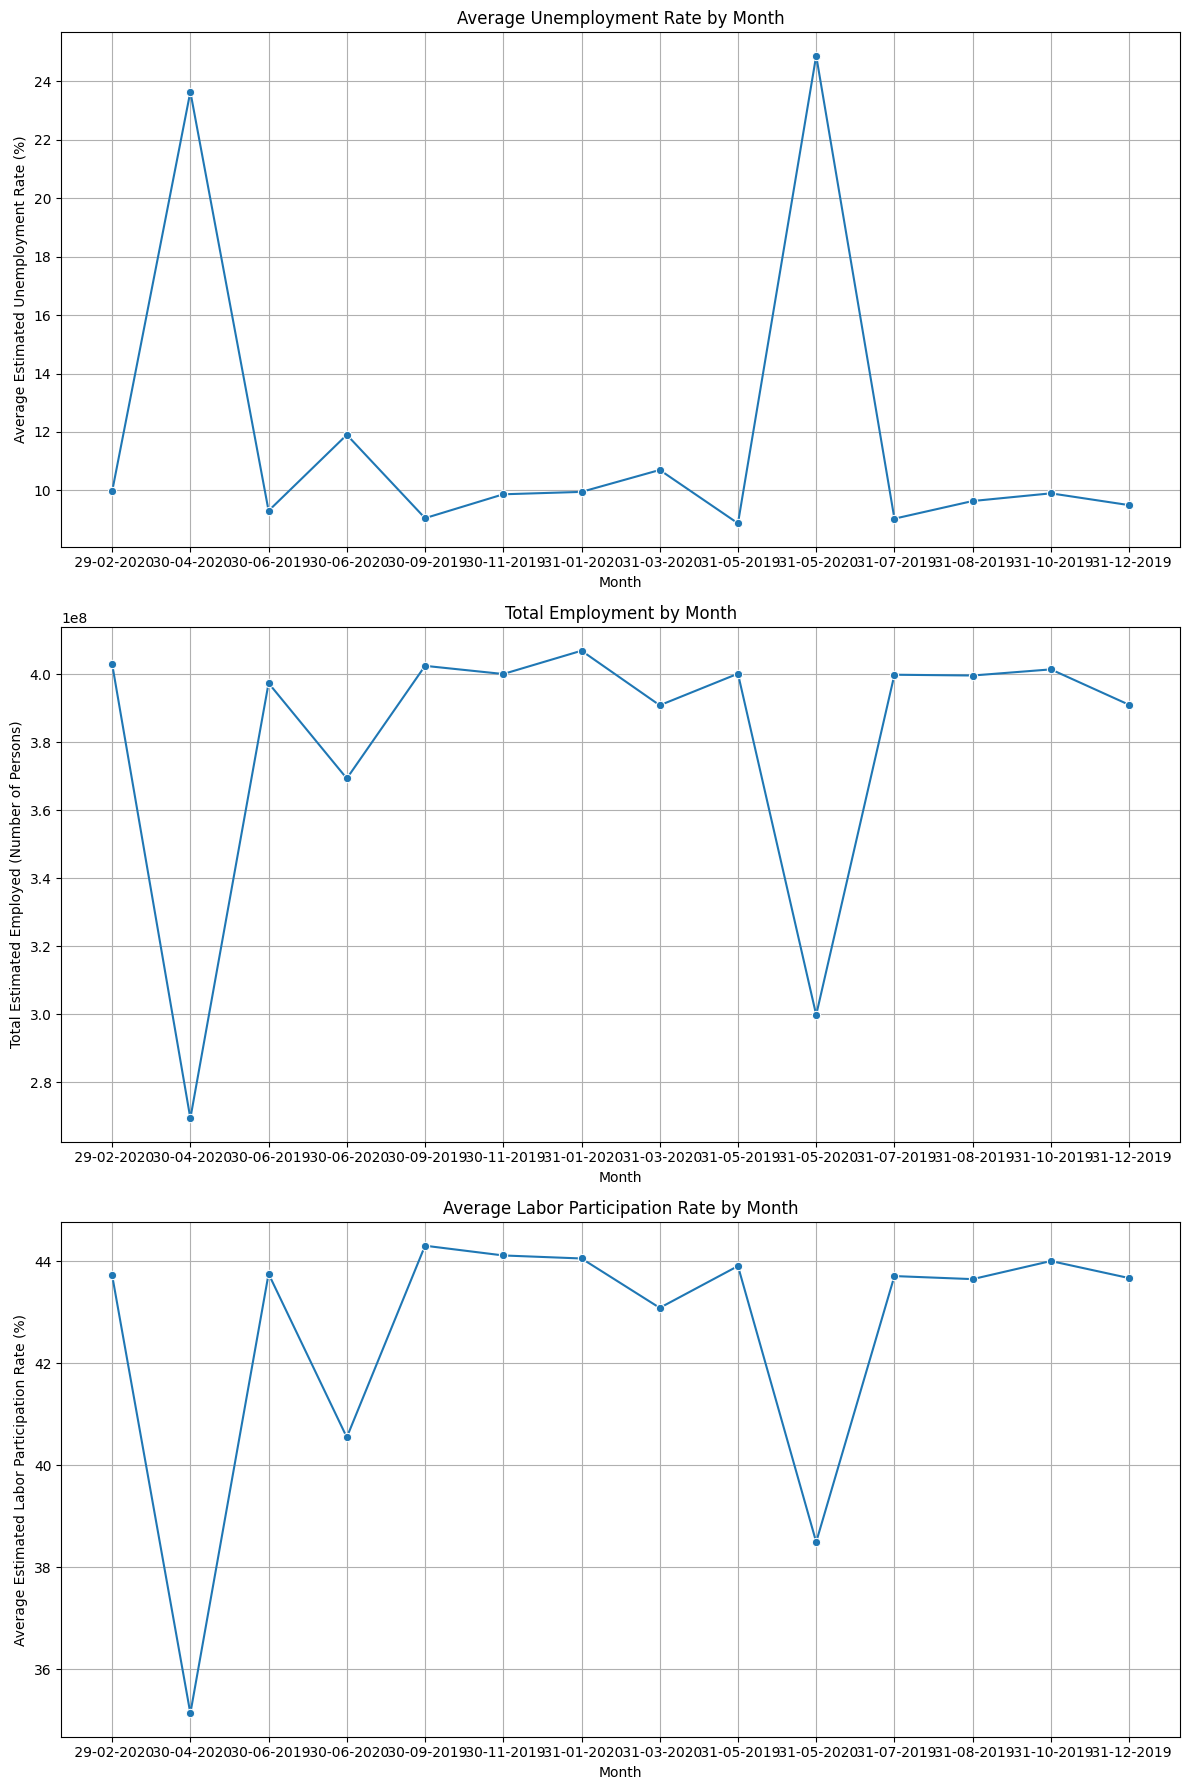

In [21]:
df['month'] = df[' Date']

# Step 2: Group by month and calculate the average unemployment rate, total employment, and average labor participation rate
monthly_summary = df.groupby('month').agg({
    ' Estimated Unemployment Rate (%)': 'mean',
    ' Estimated Employed': 'sum',
    ' Estimated Labour Participation Rate (%)': 'mean'
}).reset_index()

# Step 3: Visualize the monthly trends
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

sns.lineplot(x='month', y=' Estimated Unemployment Rate (%)', data=monthly_summary, marker='o', ax=ax[0])
ax[0].set_title('Average Unemployment Rate by Month')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Average Estimated Unemployment Rate (%)')
ax[0].grid(True)

sns.lineplot(x='month', y=' Estimated Employed', data=monthly_summary, marker='o', ax=ax[1])
ax[1].set_title('Total Employment by Month')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Total Estimated Employed (Number of Persons)')
ax[1].grid(True)

sns.lineplot(x='month', y=' Estimated Labour Participation Rate (%)', data=monthly_summary, marker='o', ax=ax[2])
ax[2].set_title('Average Labor Participation Rate by Month')
ax[2].set_xlabel('Month')
ax[2].set_ylabel('Average Estimated Labor Participation Rate (%)')
ax[2].grid(True)

plt.tight_layout()
plt.show()

In [19]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

Column names: Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'month', 'estimated_labor_force', 'Labor Force', 'Unemployed'],
      dtype='object')
Unique values in 'Area' column: ['Rural' nan 'Urban']
Total employed in urban areas: 203567531.47146362
Total employed in rural areas: 288348182.7561302


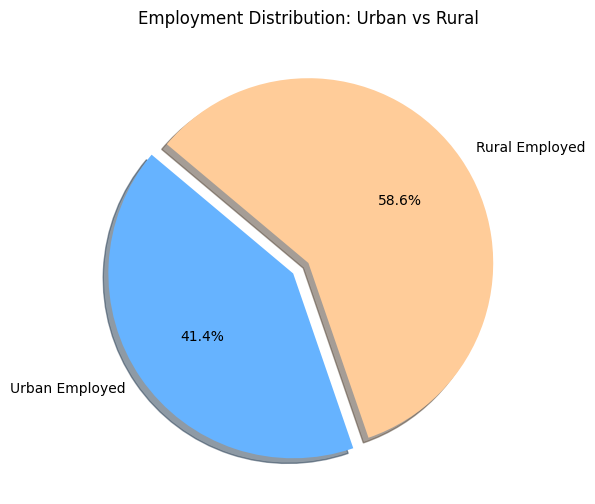

In [31]:
print("Column names:", df.columns)

# Debug: Print unique values in the 'Area' column
print("Unique values in 'Area' column:", df['Area'].unique())

# Ensure 'Area' column values are in lowercase
df['Area'] = df['Area'].str.lower().str.strip()

# Calculate total employment for urban and rural areas
total_employed_urban = df[df['Area'] == 'urban']['Estimated Employed'].sum()
total_employed_rural = df[df['Area'] == 'rural']['Estimated Employed'].sum()

# Debug: Print total employment values
print("Total employed in urban areas:", total_employed_urban)
print("Total employed in rural areas:", total_employed_rural)

# Create the pie chart
labels = ['Urban Employed', 'Rural Employed']
sizes = [total_employed_urban, total_employed_rural]
colors = ['#66b3ff', '#ffcc99']
explode = (0.1, 0)  # explode the 1st slice (Urban Employed)

plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Employment Distribution: Urban vs Rural')
plt.show()